In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
import scipy.io
from scipy import signal
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from scipy.signal import csd
plt.style.use('./custom_latex_style.mplstyle')


In [2]:

import os
if not os.path.exists('figures'):
   os.makedirs('figures')
   print(' The folder ''figures'' is created')
else:
    print(' The folder ''figures'' already exists')



 The folder figures already exists


In [3]:
# %% Load the data from the five masts
data= scipy.io.loadmat('Data_for_excercise_v2.mat')

u = np.squeeze(np.array(data['u']))
v = np.squeeze(np.array(data['v']))
w = np.squeeze(np.array(data['w']))
time = np.squeeze(np.array(data['t']))

# Remove NaNs if necessary
indNaN = np.argwhere(~np.isnan(np.mean(u,1)))
indNaN = indNaN[:,0]
time = time[indNaN]
v = v[indNaN,:]
w = w[indNaN,:]
u = u[indNaN,:]

# Get the number of sensors and time step
Nsensors = u[0,:].size
N = u[:,0].size


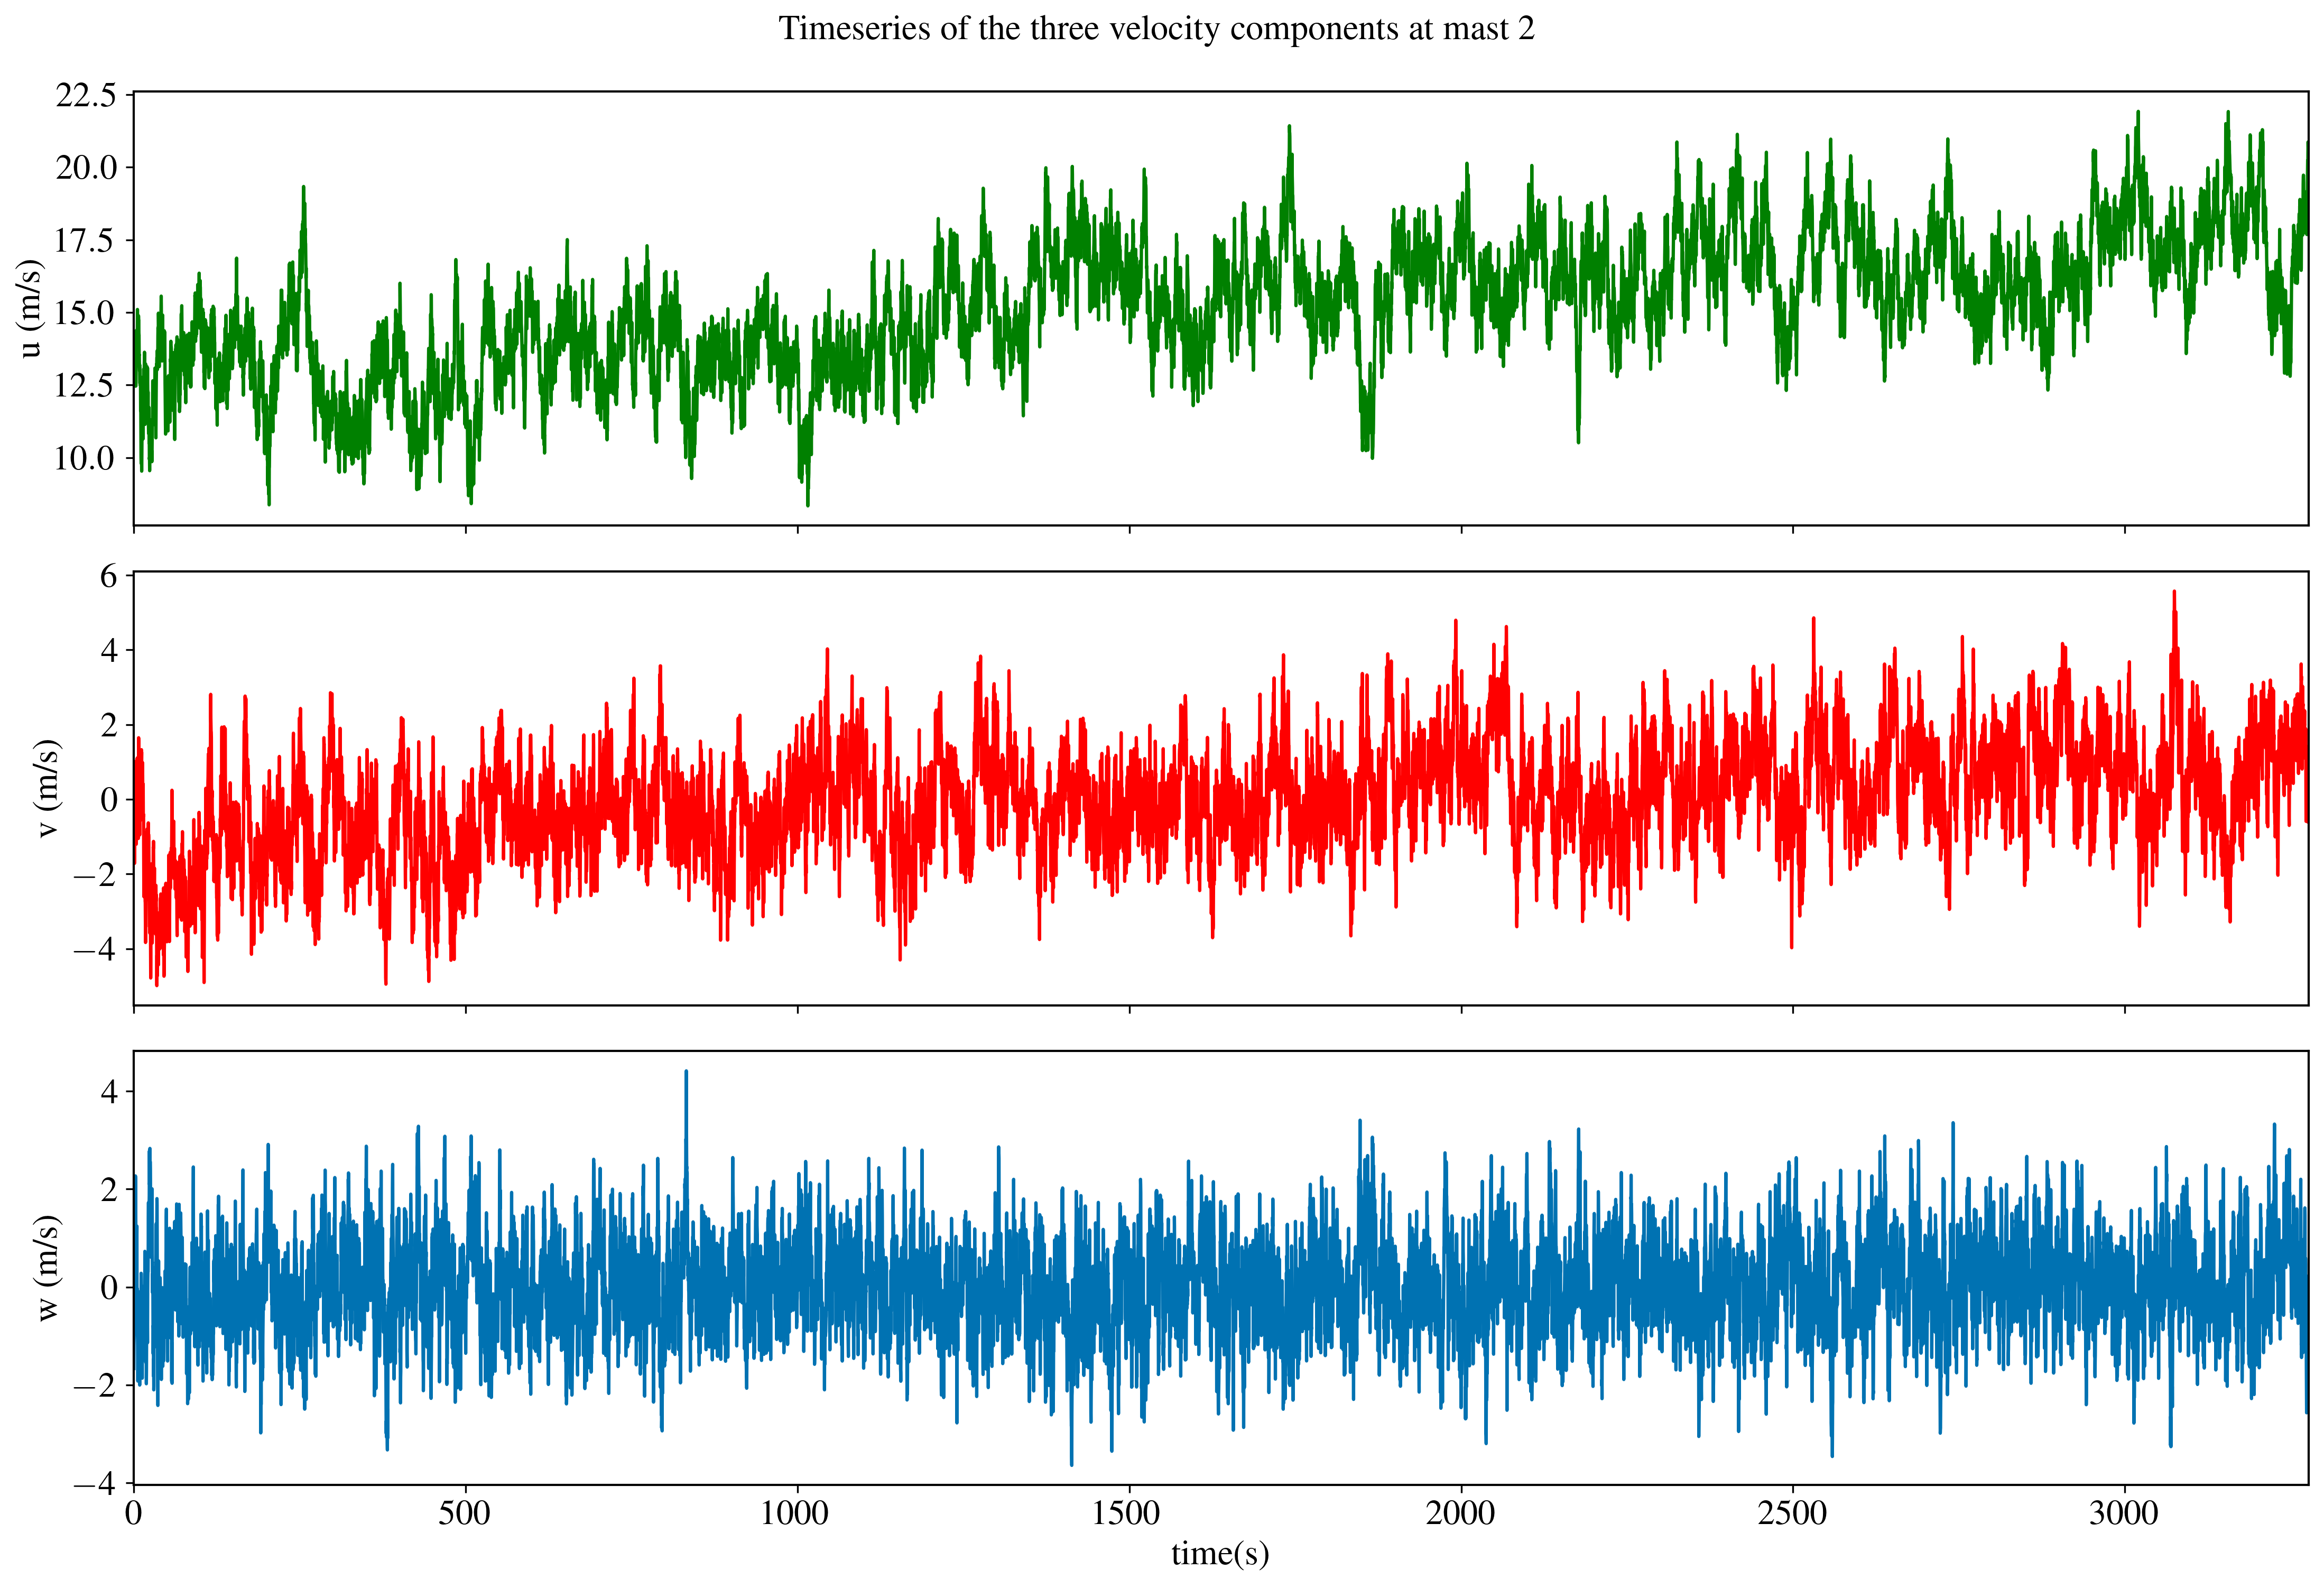

In [43]:
fig,ax = plt.subplots(3,1, figsize=(15,10),sharex=True)
ax[0].plot(time, u[:,1], color='green')
ax[1].plot(time, v[:,1], color='red')
ax[2].plot(time, w[:,1])

# Find the maximum time value among all datasets
max_time = max(time)
# Set x-axis limit to the maximum time value
for axis in ax:
    axis.set_xlim(0, max_time)


ax[0].set_ylabel('u (m/s)')
ax[1].set_ylabel('v (m/s)')
ax[2].set_ylabel('w (m/s)')
fig.suptitle(f"Timeseries of the three velocity components at mast 2")

plt.tight_layout()
plt.xlabel('time(s)')

plt.savefig('Timeseries_velocity.pdf')
plt.show()


In [5]:
dt = np.median(np.diff(time))
fs = 1/ dt
f_nyq = fs / 2
f0= 1/3277

print('The sampling time is {:.2f} s'.format(dt))
print('The sampling frequency is {:.2f} Hz'.format(fs))
print('The Nyquist frequency is {:.2f} Hz\n'.format(f_nyq))
print('The lowest measurable frequency is {:.6f} Hz\n'.format(f0))


The sampling time is 0.20 s
The sampling frequency is 5.00 Hz
The Nyquist frequency is 2.50 Hz

The lowest measurable frequency is 0.000305 Hz



In [6]:
n_window= round((1/0.2)*300)

print(n_window)

print(time[2]- time[1])


1500
0.2


In [41]:
print(stationaryTest(u[:,1], time,(n_window), 0.2, 0.4, np.mean(u[:,4])))
print(stationaryTest(v[:,1], time,n_window, 0.2, 0.4, np.mean(v[:,4])))
print(stationaryTest(w[:,1], time,n_window, 0.2, 0.4, np.mean(w[:,1])))


(0.19607302398776094, 0.44828670219357725, 1)
(inf, 0.31976748271636346, 1)
(1.5480122926640698e+17, 0.14049079441617873, 1)


In [47]:
u_detrend= np.zeros((16384,5))
v_detrend= np.zeros((16384,5))
w_detrend= np.zeros((16384,5))

for i in range(0,5):
    u_detrend[:,i] = remove_linear_trend(u[:,i])
    v_detrend[:,i] = remove_linear_trend(v[:,i])
    w_detrend[:,i] = remove_linear_trend(w[:,i])
    fig, ax= plt.subplots(3,1)
    ax[0].plot(time, u_detrend[:,i], label='Detrended')
    ax[0].plot(time,u[:,i], label='Not-detrended', alpha=0.5, color='red')
    ax[1].plot(time, v_detrend[:,i])
    ax[2].plot(time, w_detrend[:,i])
    ax[0].set_ylabel('u (m/s)')
    ax[1].set_ylabel('v (m/s)')
    ax[2].set_ylabel('w (m/s)')
    fig.suptitle(f"Detrended signal for u,v and w at mast {i+1}")
    plt.xlabel('time(s)')
    #ax[0].legend(bbox_to_anchor=(1.1, 1.05))
 
    plt.tight_layout()
   plt.savefig(f'detrend_{i}.pdf')
    plt.show


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

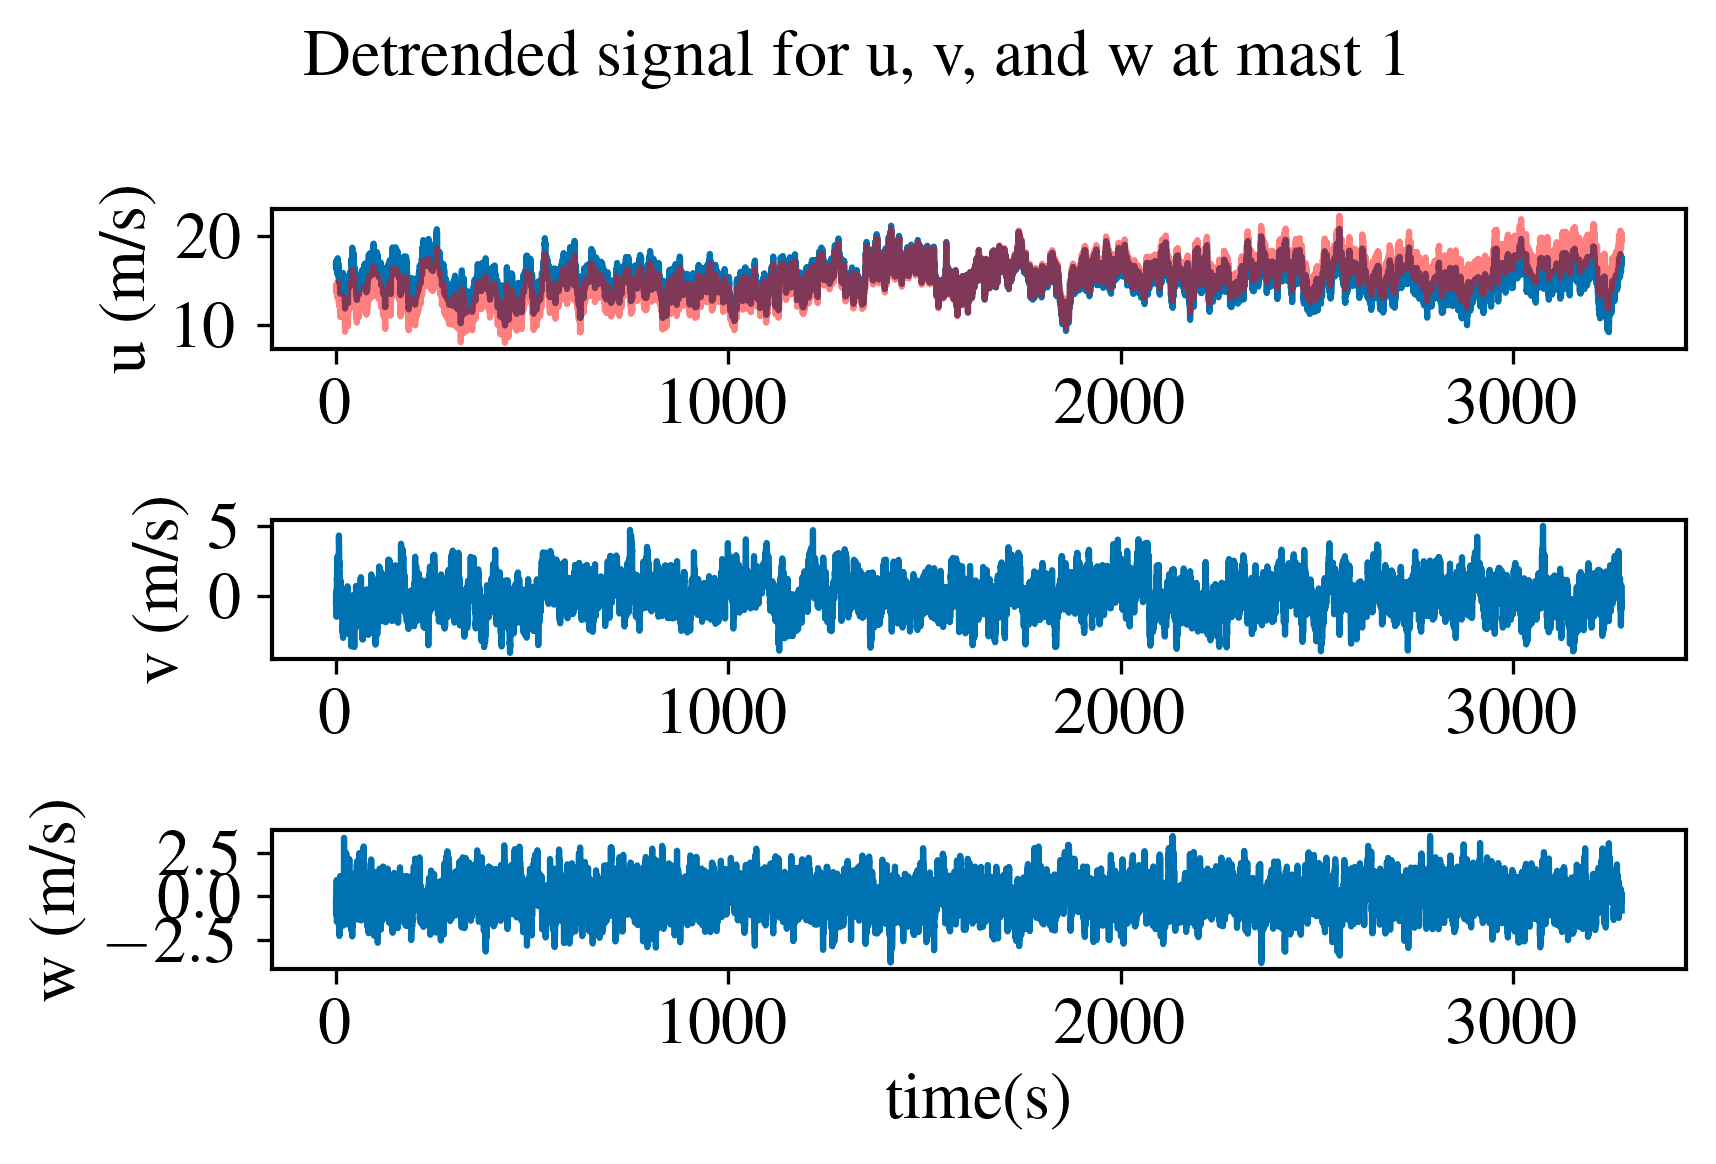

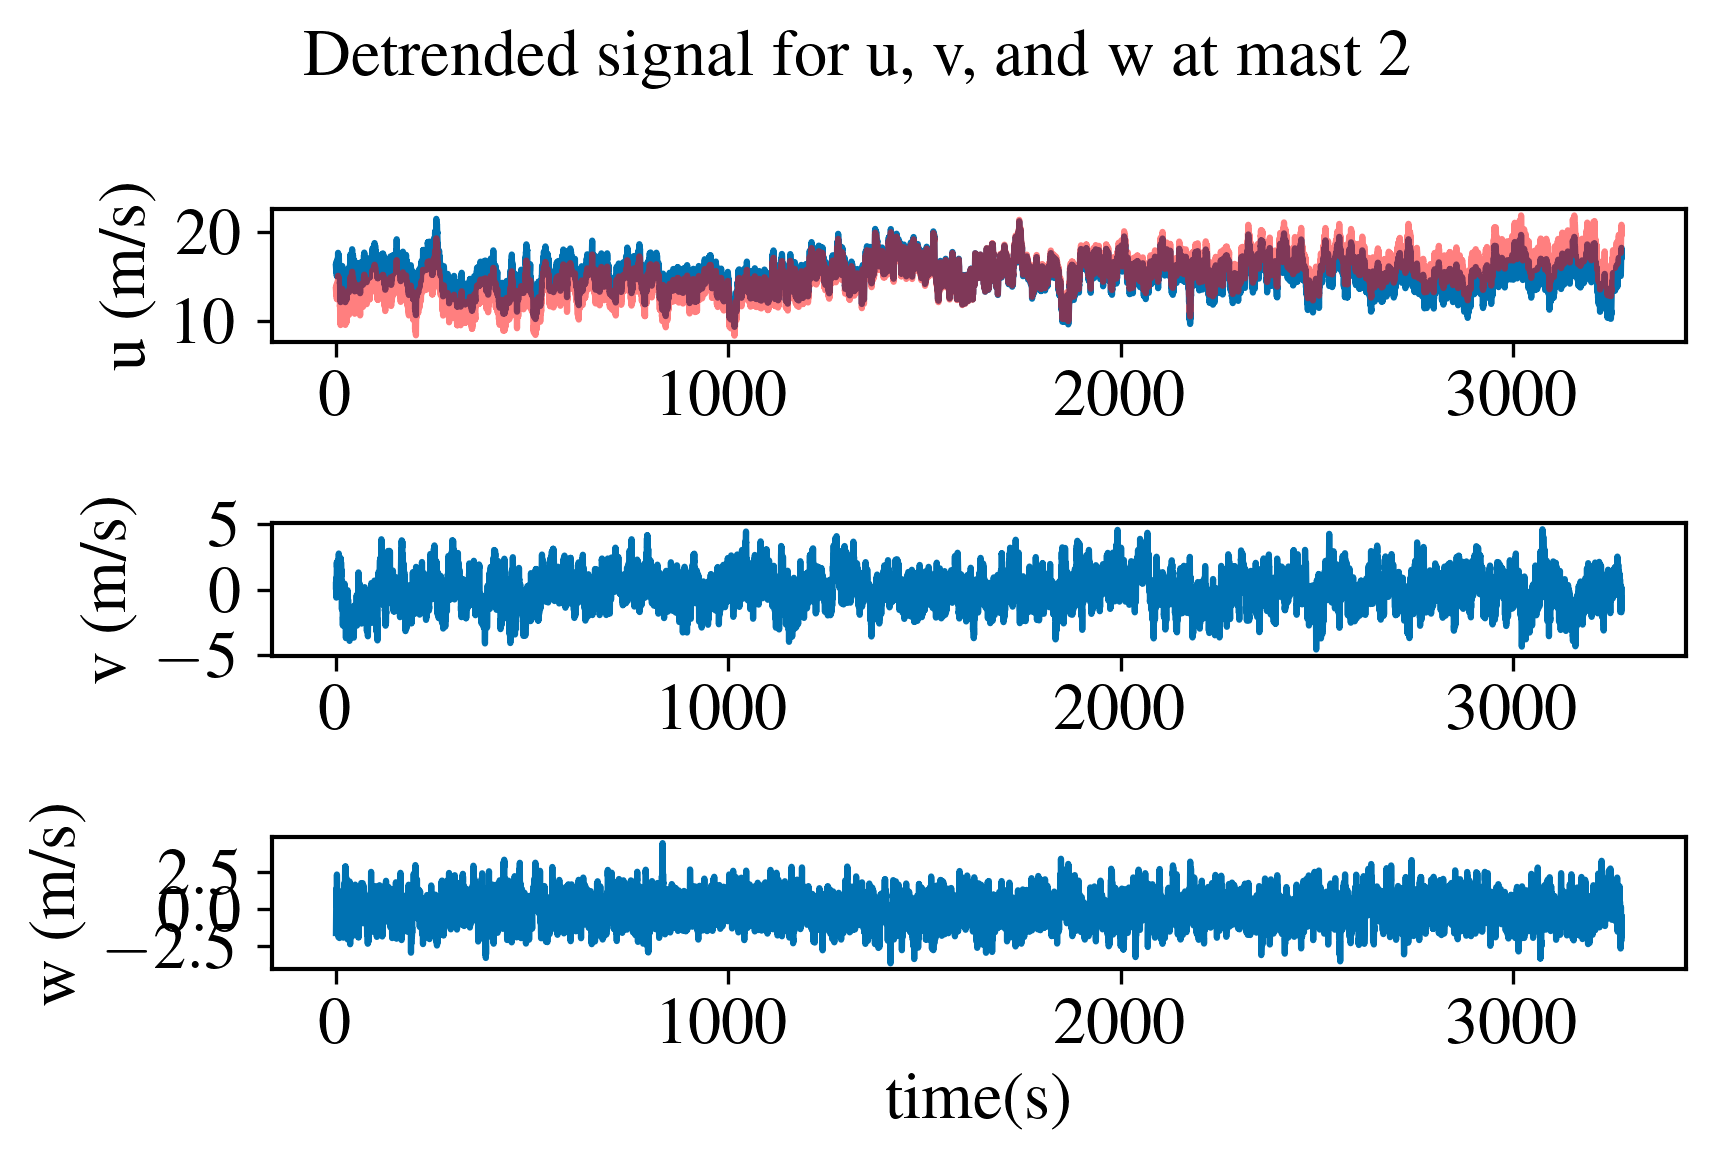

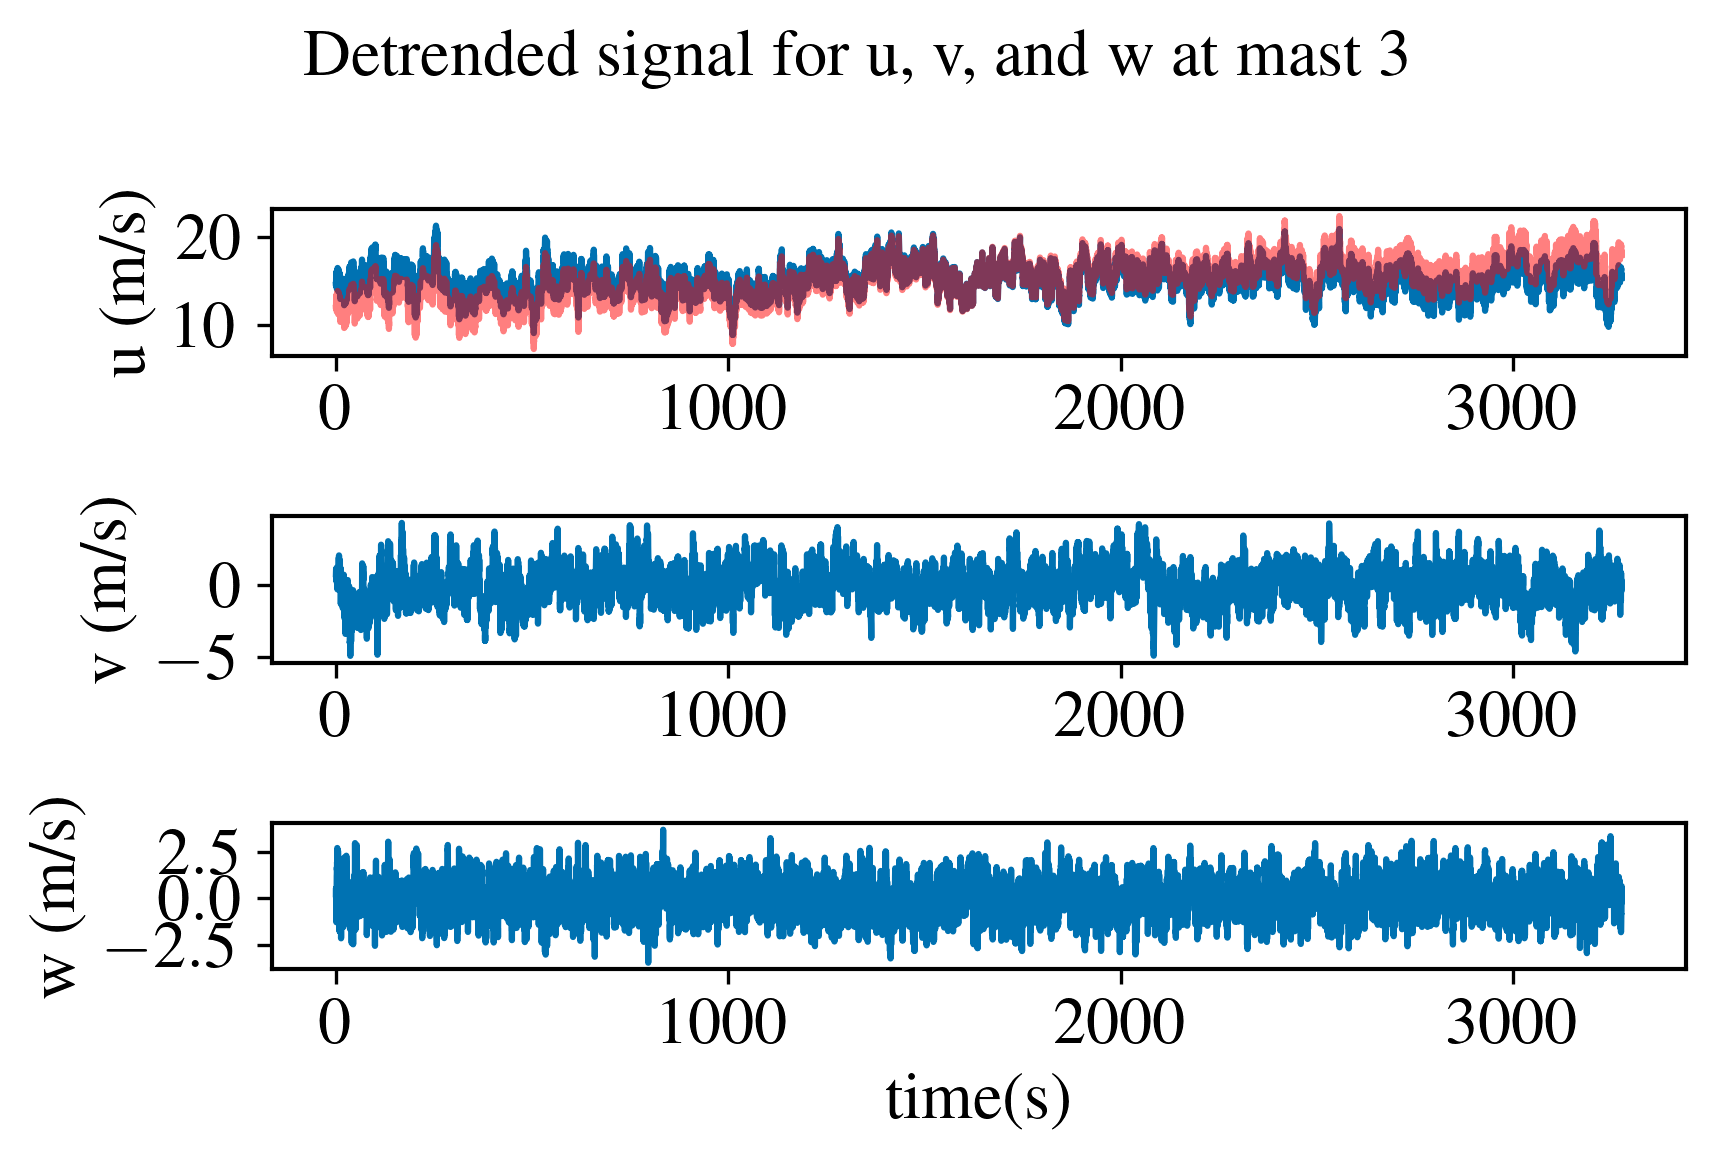

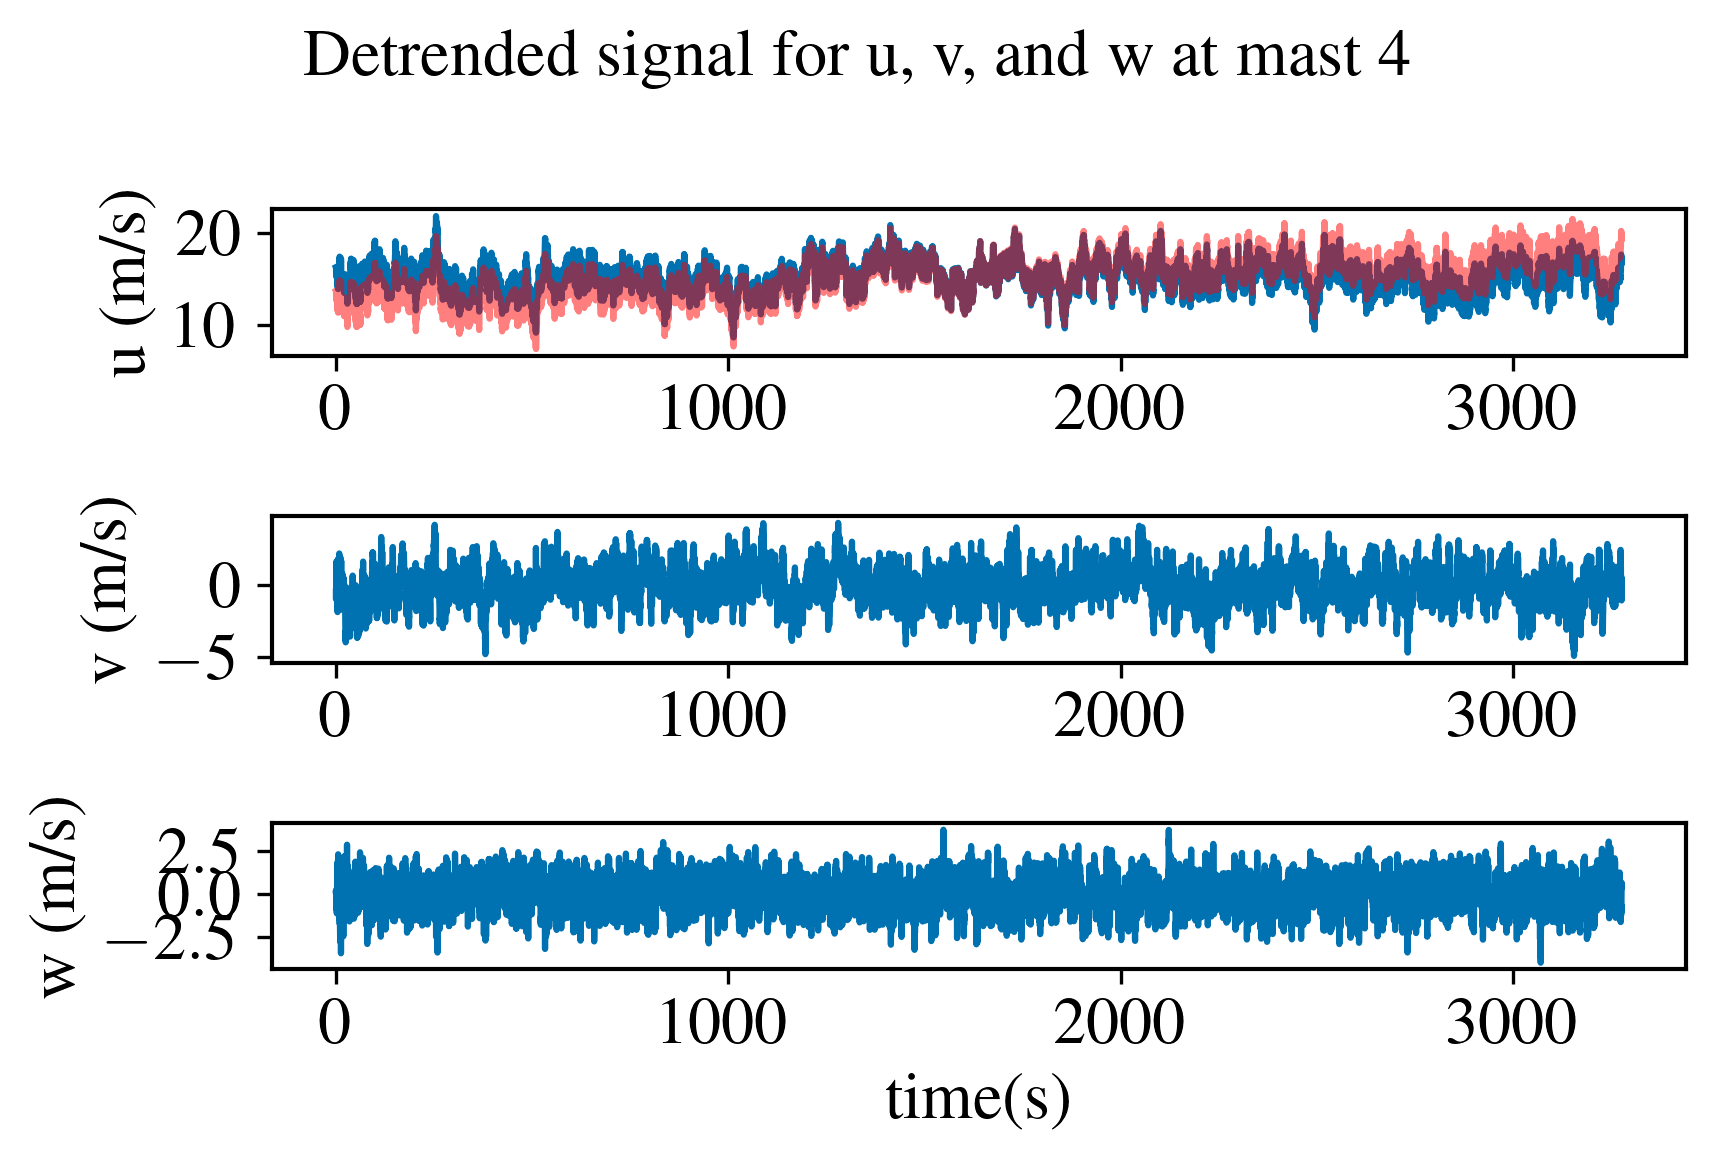

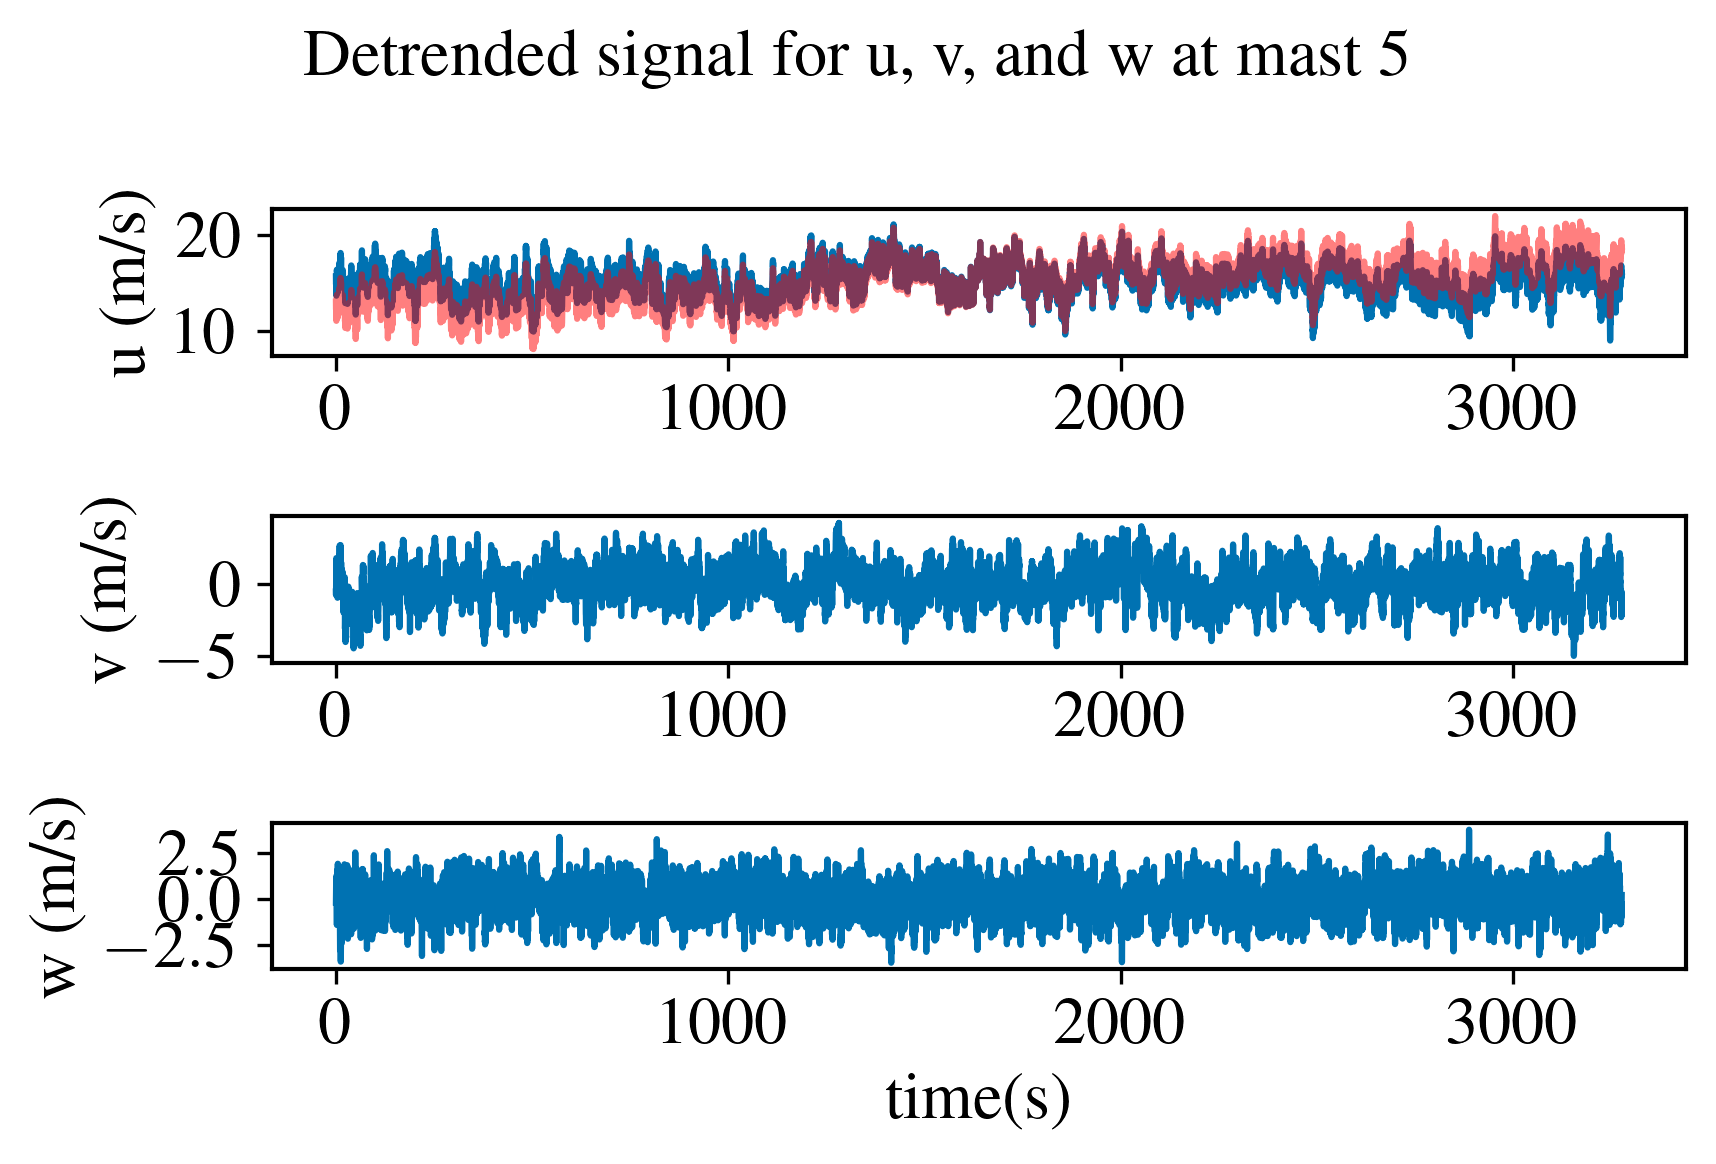

In [48]:
u_detrend = np.zeros((16384, 5))
v_detrend = np.zeros((16384, 5))
w_detrend = np.zeros((16384, 5))

for i in range(5):
    u_detrend[:, i] = remove_linear_trend(u[:, i])
    v_detrend[:, i] = remove_linear_trend(v[:, i])
    w_detrend[:, i] = remove_linear_trend(w[:, i])
    
    fig, ax = plt.subplots(3, 1)
    ax[0].plot(time, u_detrend[:, i], label='Detrended')
    ax[0].plot(time, u[:, i], label='Not-detrended', alpha=0.5, color='red')
    ax[1].plot(time, v_detrend[:, i])
    ax[2].plot(time, w_detrend[:, i])
    ax[0].set_ylabel('u (m/s)')
    ax[1].set_ylabel('v (m/s)')
    ax[2].set_ylabel('w (m/s)')
    fig.suptitle(f"Detrended signal for u, v, and w at mast {i+1}")
    plt.xlabel('time(s)')
    
    plt.tight_layout()
    
    # Save each figure with a unique filename
    plt.savefig(f'detrend_{i}.pdf')
    
    plt.show()

In [42]:
print(stationaryTest(u_detrend[:,1], time,(n_window), 0.2, 0.4, np.mean(v_detrend[:,4]) ))

(1.5891674618939095e+18, 0.25783663404848955, 1)


In [49]:
u_skew=[]
v_skew=[]
w_skew=[]

u_kurtosis=[]
v_kurtosis=[]
w_kurtosis=[]

u_mean=[]
v_mean=[]
w_mean=[]

u_turbulence=[]
v_turbulence=[]
w_turbulence=[]

for i in range(0,5):
    u_skew.append(skew(u_detrend[:,i]))
    v_skew.append(skew(v_detrend[:,i]))
    w_skew.append(skew(w_detrend[:,i]))
    u_kurtosis.append(kurtosis(u_detrend[:,i], fisher=False))
    v_kurtosis.append(kurtosis(v_detrend[:,i], fisher=False))
    w_kurtosis.append(kurtosis(w_detrend[:,i], fisher=False))
    u_mean.append(np.mean(u_detrend[:,i]))
    v_mean.append(np.mean(v_detrend[:,i]))
    w_mean.append(np.mean(w_detrend[:,i]))
    u_turbulence.append(np.std(u_detrend[:,i]/np.mean(u_detrend[:,i])))
    v_turbulence.append(np.std(v_detrend[:,i]/np.mean(u_detrend[:,i])))
    w_turbulence.append(np.std(w_detrend[:,i]/np.mean(u_detrend[:,i])))

print(f"Skewness for u:{u_skew}, v: {v_skew}, and w:{w_skew}")
print(f"Kurtosis for u: {u_kurtosis}, v:{v_kurtosis} and w:{w_kurtosis}")
print(f"Mean for u: {u_mean}, v:{v_mean} and w:{w_mean}")
print(f"Turbulence for u: {u_turbulence}, v:{v_turbulence} and w:{w_turbulence}")

print(np.std(v_detrend[:,i])/np.mean(u_detrend[:,i]))


Skewness for u:[-0.014061094812799737, -0.05663675587924423, -0.062390955382670546, -0.06111683578753427, -0.09199639413438178], v: [0.06705063943135456, 0.03243602779887334, 0.033463534110603724, -0.042676386124298624, -0.07199322905928424], and w:[-0.014330119771796133, 0.05320000121500573, 0.03414635668136188, -0.0691714736992696, -0.03853625701463631]
Kurtosis for u: [2.9670377766788882, 3.090816222661486, 3.14185416076275, 3.1245798593545335, 2.941364301561447], v:[2.9856241405586457, 3.006294389343387, 3.1192280775280525, 3.088924927375626, 2.9097972587096863] and w:[3.0061383693548764, 3.113651018172332, 2.9618500579847016, 2.8947940926007654, 2.918079392871039]
Mean for u: [15.201804919084164, 15.201804919084164, 15.201804919084164, 15.201804919084164, 15.201804919084164], v:[5.551115123125783e-17, 3.469446951953614e-17, 3.469446951953614e-17, -3.8163916471489756e-17, 1.0408340855860843e-17] and w:[1.3877787807814457e-17, -2.688821387764051e-17, 3.469446951953614e-18, -1.734723

In [20]:
fric_velocity=[]
R=np.zeros((3,3))

for i in range(0,5):
    fric= frictionVelocity(u_detrend[:,i],v_detrend[:,i],w_detrend[:,i])
    fric_velocity.append(fric[0])
    R+=(fric[1])

r_av=R/5

print(fric_velocity)
print(r_av)



[0.8148794604185674, 0.7969962860807522, 0.7904645597710374, 0.7909655262457936, 0.7980920383460615]
[[ 2.73705041 -0.03603794 -0.63714662]
 [-0.03603794  1.63430843  0.00915507]
 [-0.63714662  0.00915507  0.88939745]]


In [ ]:
r_avg= np.zeros((3,3))
for i in range(0,5):
    fric_velocity,R= fric_velocity(u_detrend)

/Users/rebekkamongstad/opt/anaconda3/envs/GEOF232/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


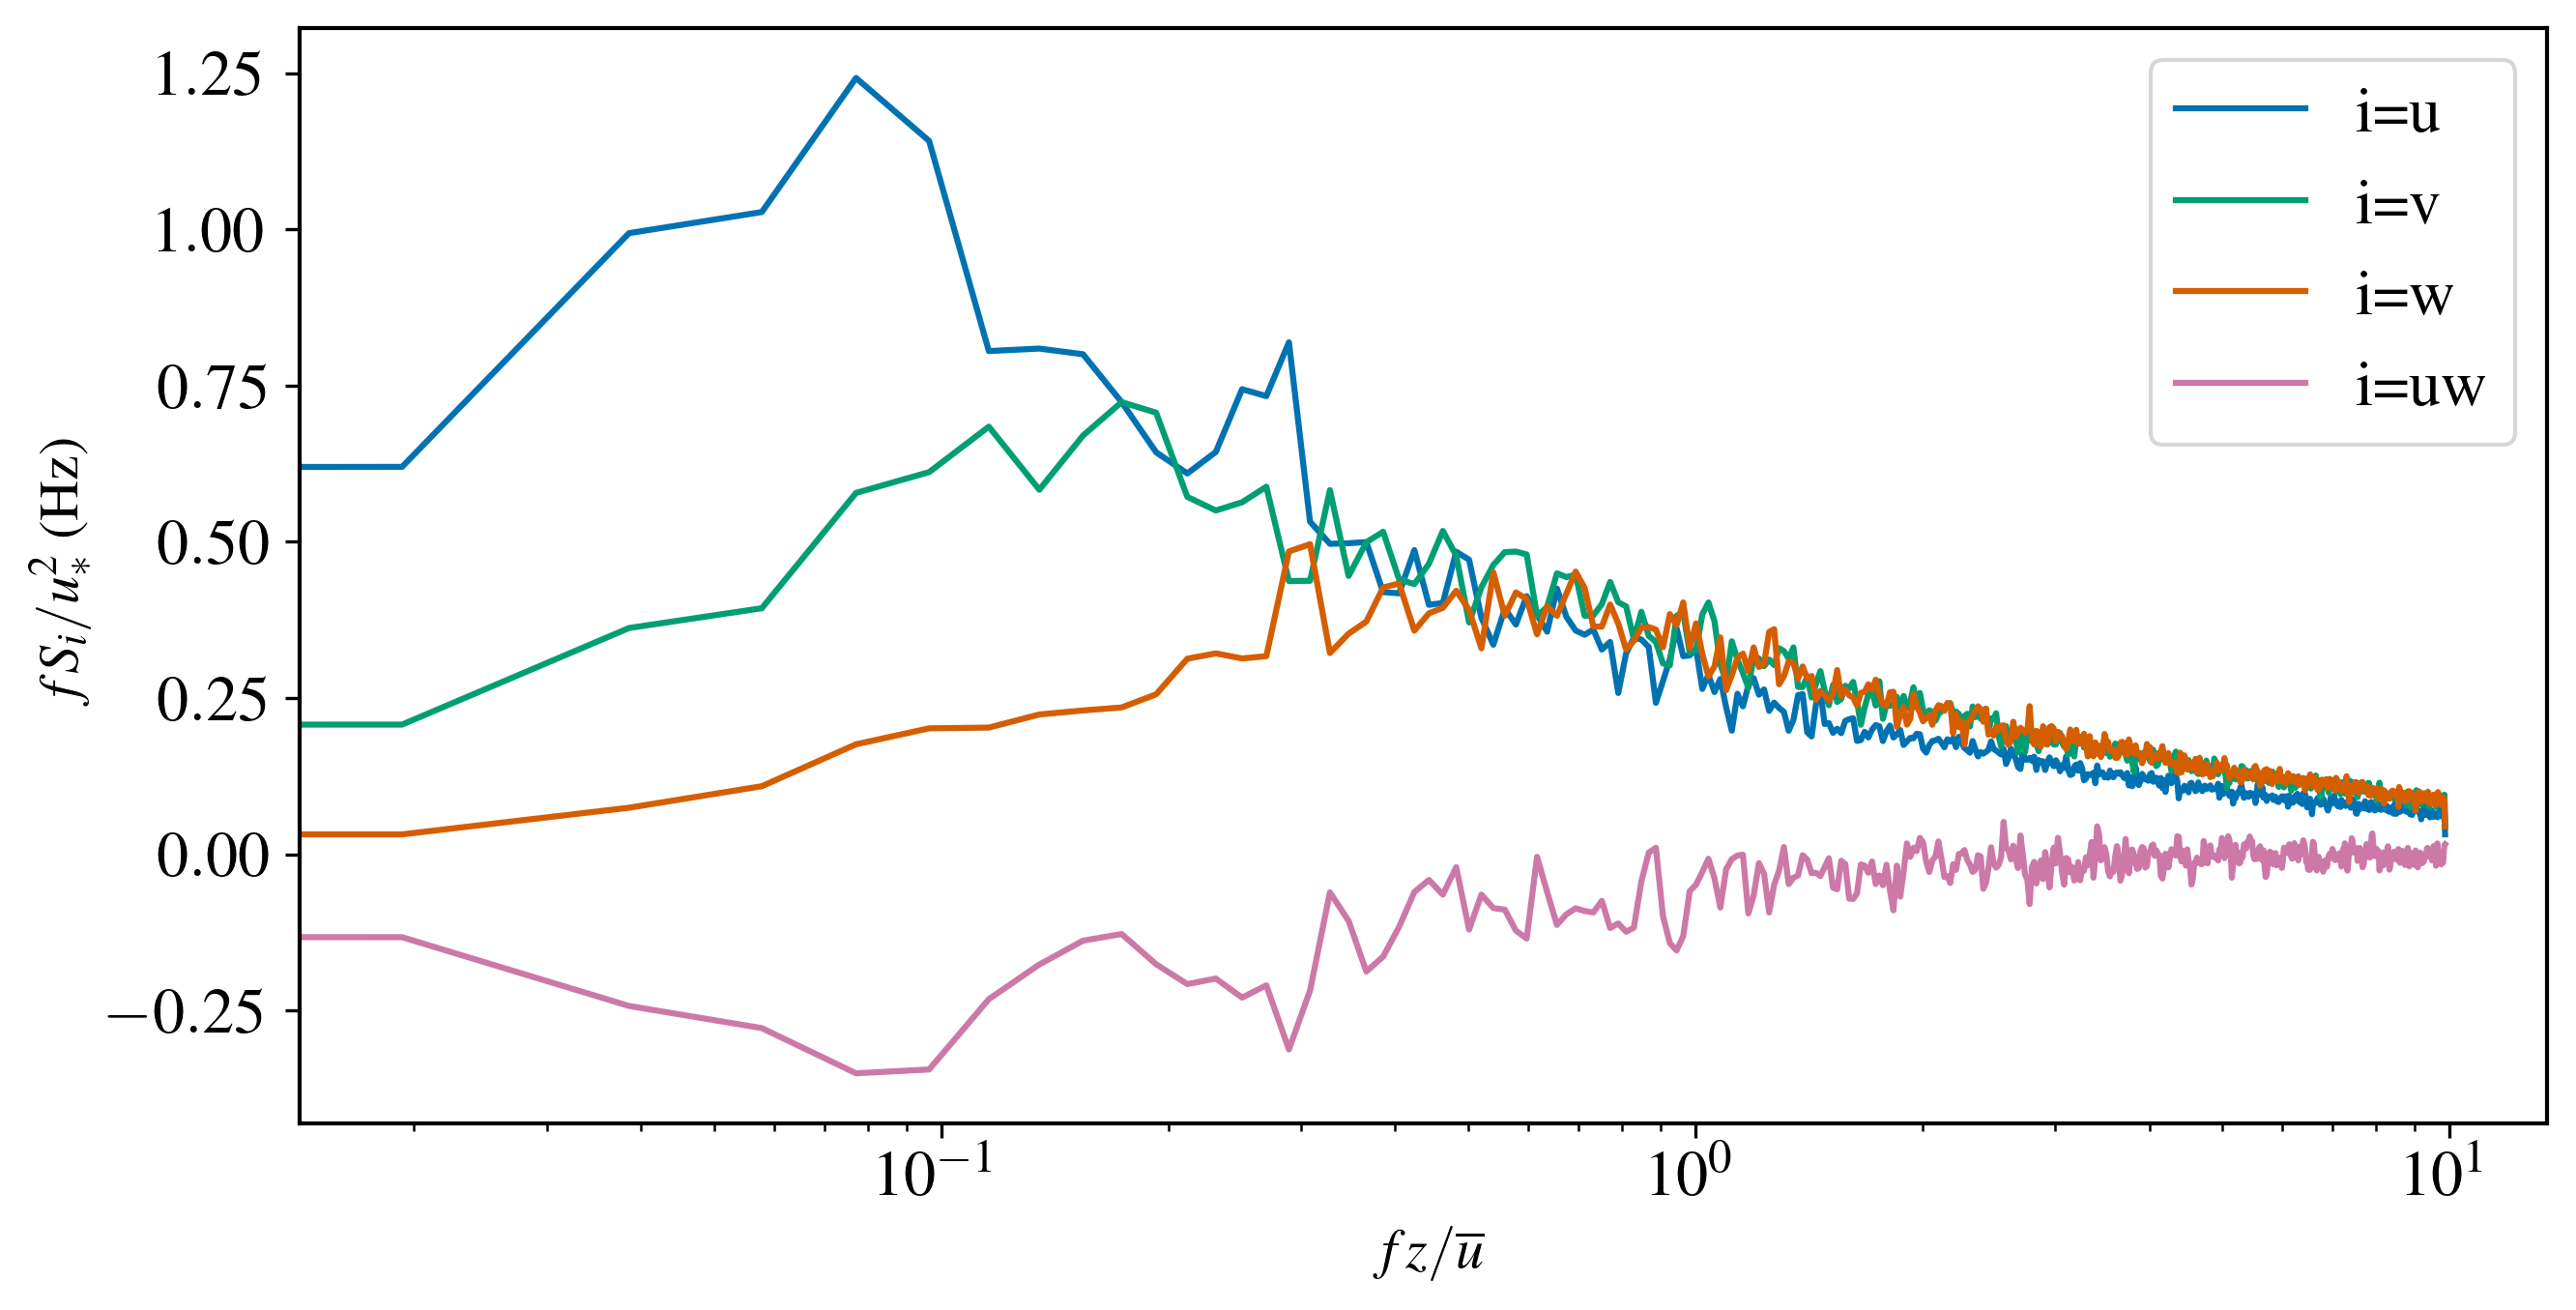

In [136]:
nperseg=N//16 #bruker 16 istedenfor 3
noverlap= nperseg//2
h= 60 

f_su, psd_su= welch(u_detrend[:,1], fs=fs, nperseg=nperseg, noverlap=noverlap)
f_sv, psd_sv= welch(v_detrend[:,1],fs=fs, nperseg=nperseg, noverlap=noverlap)
f_sw, psd_sw= welch(w_detrend[:,1],fs=fs, nperseg=nperseg, noverlap=noverlap)
f_suw, psd_suw = csd(u_detrend[:,1],w_detrend[:,1], fs=fs, nperseg=nperseg, noverlap=noverlap)

su= (f_su*psd_su)/(np.mean(fric_velocity[1]**2))
sv= (f_sv*psd_sv)/(np.mean(fric_velocity[1]**2))
sw= (f_sw*psd_sw)/(np.mean(fric_velocity[1]**2))
suw= (f_suw*psd_suw)/np.mean(fric_velocity[1]**2)

norm_f_su= f_su*60/(np.mean(u_detrend[:,1]))

s_uw= psd_sw/psd_su
s_vu=psd_sv/psd_su



plt.figure(figsize=(10, 5))
plt.semilogx(norm_f_su, su,  label='i=u' )
plt.semilogx(norm_f_su, sv,  label='i=v' )
plt.semilogx(norm_f_su, sw , label= 'i=w')
plt.semilogx(norm_f_su, suw, label='i=uw' )
plt.xlabel('$f z / \\overline{u}$', fontsize=14)
plt.ylabel('$fS_i/u^2_* $ (Hz)', fontsize=14)
plt.legend()

plt.savefig('welch.pdf')
plt.show()

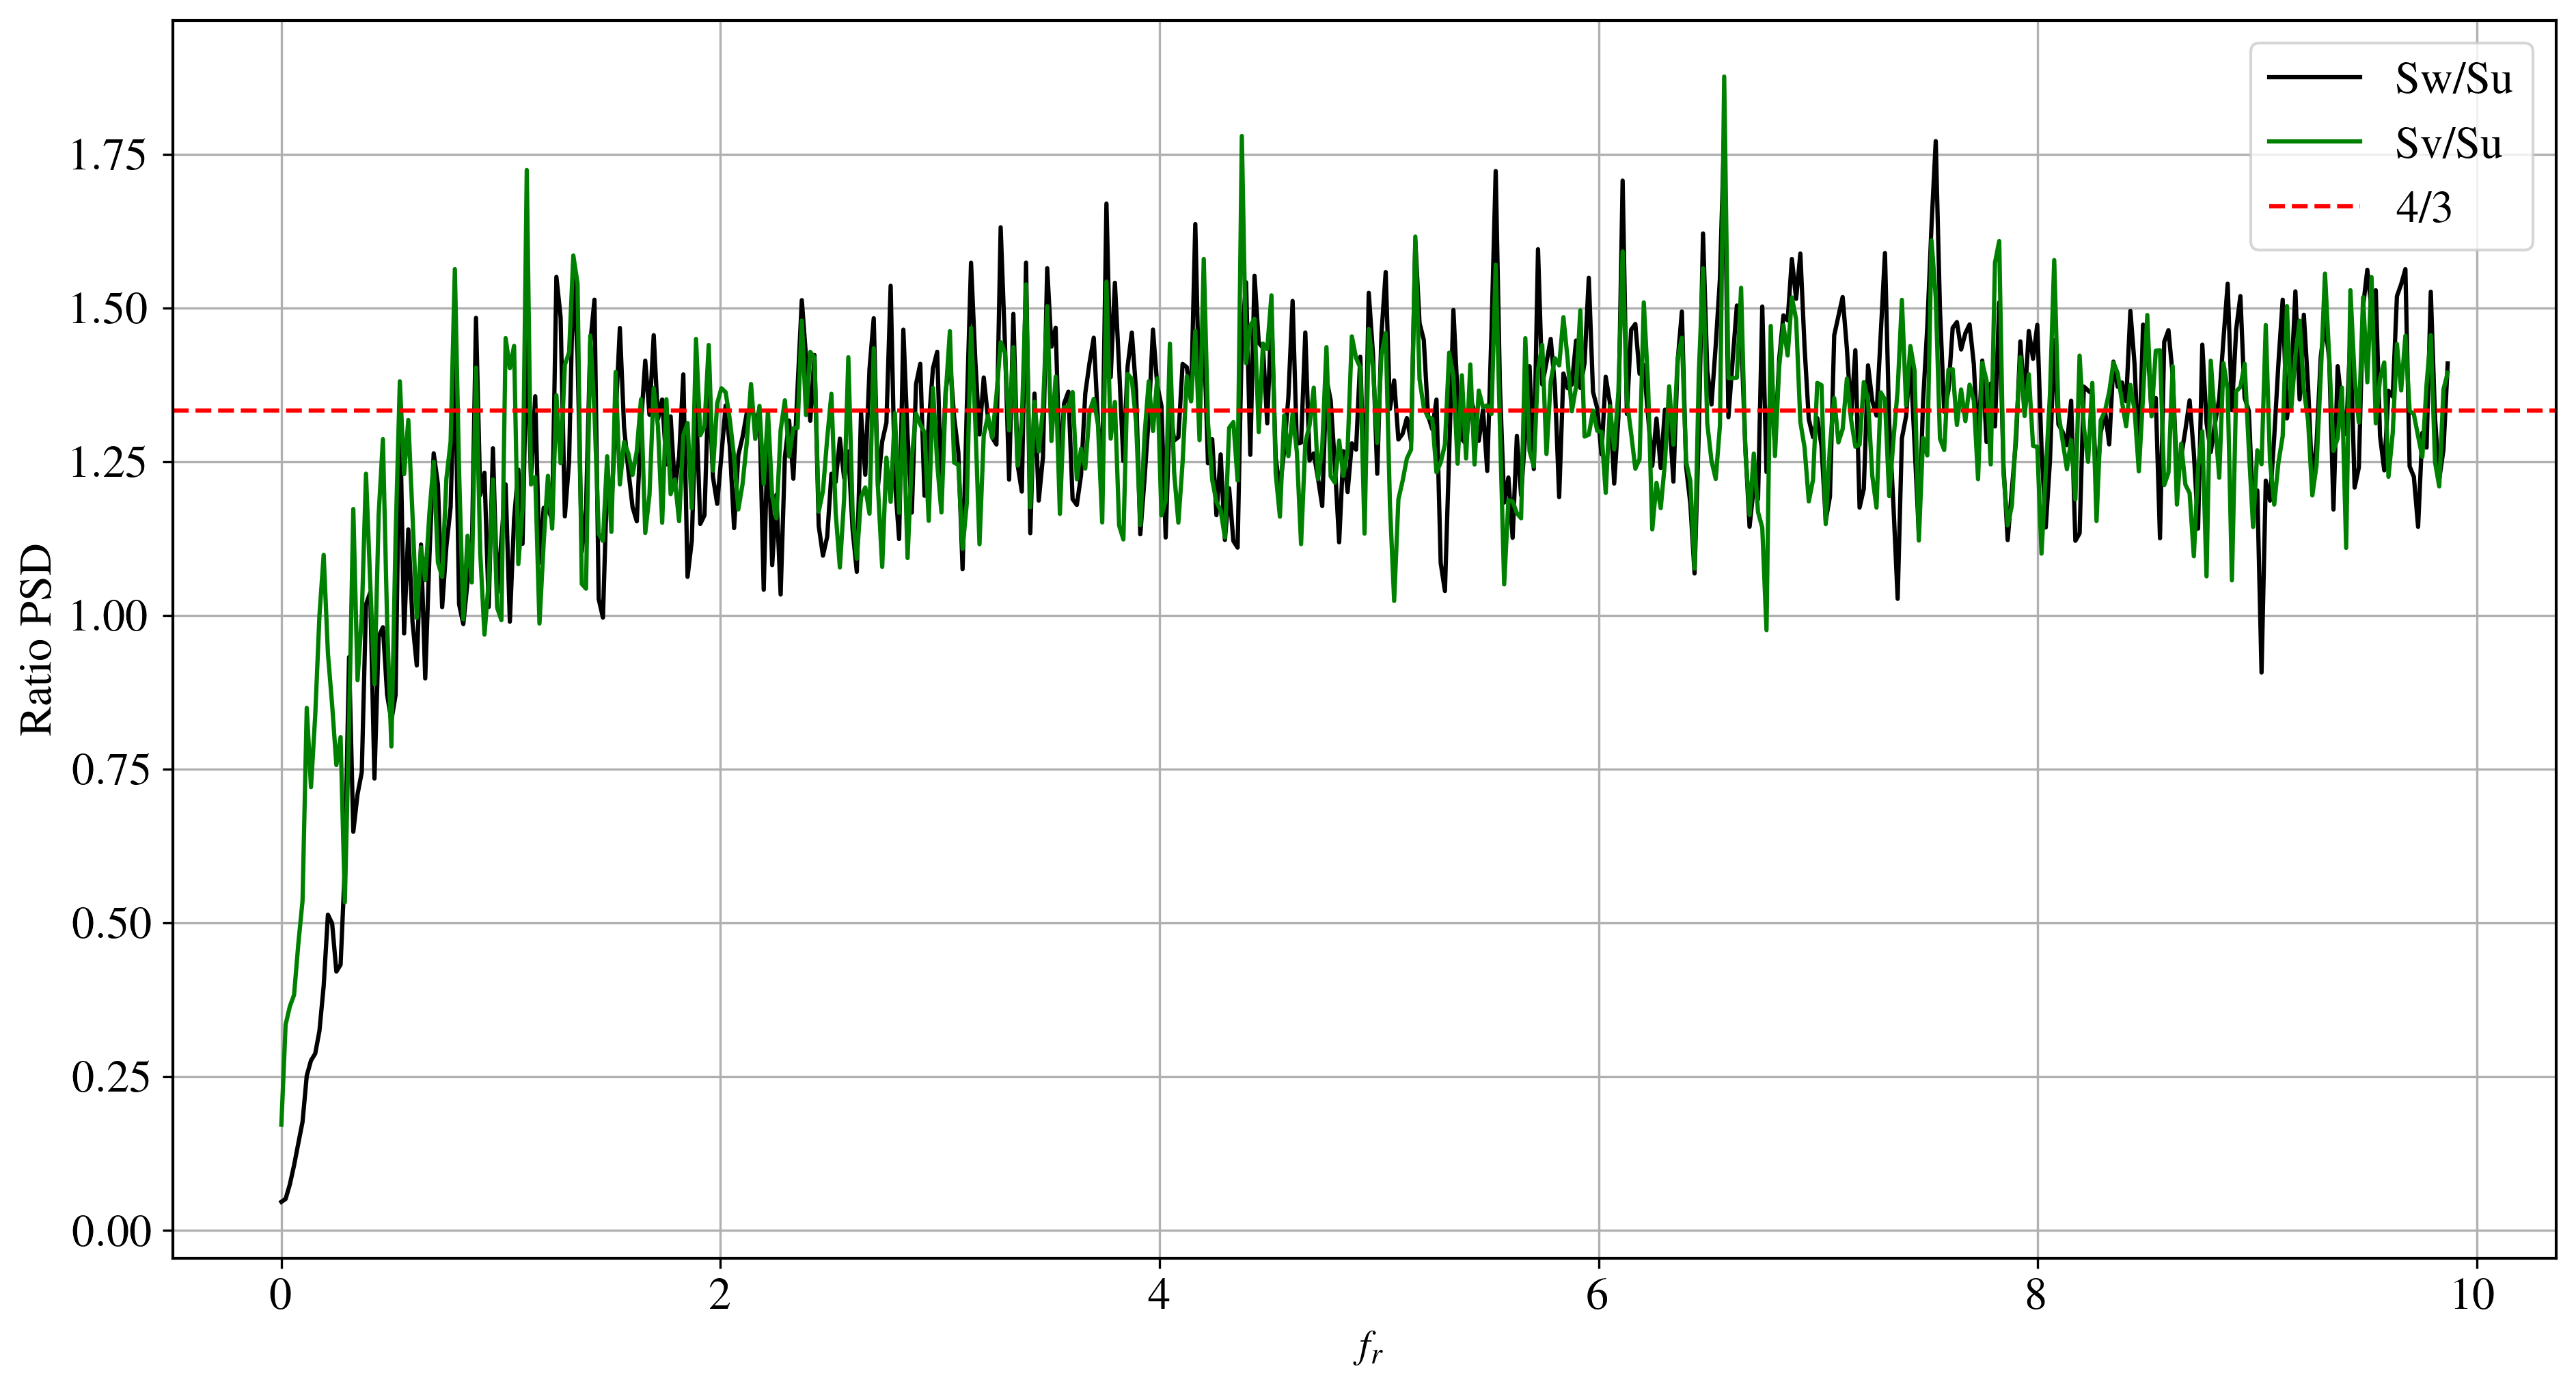

In [137]:
s_uw= psd_sw/psd_su
s_vu=psd_sv/psd_su

plt.figure(figsize=(15,8))
plt.plot(norm_f_su, s_uw, color='black', label='Sw/Su')
plt.plot(norm_f_su, s_vu, color='green', label='Sv/Su')
plt.axhline(y=4/3 ,linestyle= '--', color='red', label='4/3')
plt.xlabel('$f_r$', fontsize=14)
plt.ylabel('Ratio PSD')
plt.legend()
plt.grid(True)
plt.savefig('ratio.pdf')
plt.show()